# Summary of cleaned FracFocus data
This notebook accesses the data that was cleaned and compiled in the FF-POC project. Presented here are some big-picture statistics of this cleaned set.  

In [1]:
# Preamble to set up for analysis and graphics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


results_dir = './out/'      # for local use
#results_dir = '../results/' # for CodeOcean

In [2]:
# pull data from the results directory where it is stored as a .csv file

df = pd.read_csv(results_dir+'filtered_df.csv')
df.date = pd.to_datetime(df.date)  # put date back into datetime format

# Number of Fracking Events
Plot the number of fracking 'events' (that is, unique disclosures) in the cleaned data.

## By year

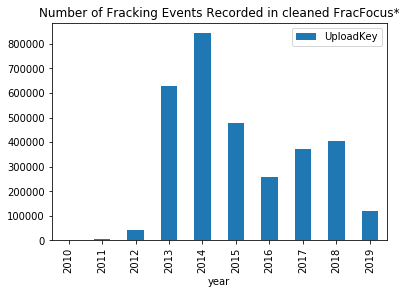

In [3]:
df['year'] = df.date.dt.year
gb =df.groupby('year',as_index=False)['UploadKey'].count()
gb.plot.bar('year','UploadKey',title='Number of Fracking Events Recorded in cleaned FracFocus*');

*Note that this represents a FracFocus bulk download from June 25, 2019, and therefore 2019 is a partial year. 
Note also that ALL events of Version 1 of FracFocus are not included in the bulk download.  Although one can download individual pdfs from FracFocus.org for events between 2011 and 2013, many of those are not included in the data analyzed here.

## By State
Show the number of fracking events by State, sorted by frequency

In [4]:
gb =df.groupby(['bgStateName','UploadKey'],as_index=False)['bgCAS'].count()
gb2 = gb.groupby('bgStateName',as_index=False)['UploadKey'].count() 
gb2.sort_values('UploadKey',ascending=False)
gb3 = df.groupby(['bgStateName'],as_index=False)['bgCAS'].count()
mg = pd.merge(gb2,gb3,on='bgStateName',how='left')
mg.columns = ['State','Num_Events','Num_Chemical_Records']
mg.sort_values('Num_Events',ascending=False)

,State,Num_Events,Num_Chemical_Records
23,texas,49493,1581404
21,oklahoma,10947,331130
4,colorado,9733,281268
19,north dakota,8327,262534
22,pennsylvania,5017,124945
17,new mexico,3907,117428
27,wyoming,3177,81670
24,utah,2788,93868
3,california,2356,56692
20,ohio,2122,65120


# Water Use

All fracking events in the **filtered** data set use water as the carrier or base fluid.  Here we report the range of volumes (in gallons) across the entire, filtered data set.  

Note that because the range of volumes spans several orders of magnitude, we present the summary data in **log base 10** format.  To read these graphs, use the log values on the y-axis as an indication of how many zeros there are in the value.  For example, a value on the y-axis at exactly 4 translates to 10,000.  A value of 6 translates to 1,000,000 and a value of 8 is 100,000,000 gallons.

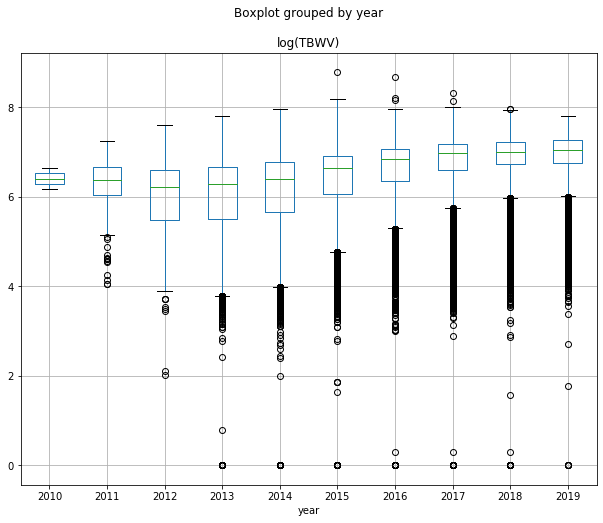

In [5]:
t = df.groupby('UploadKey',as_index=False)['TotalBaseWaterVolume','bgStateName','year'].first() # only need one from each event
t['log(TBWV)'] = np.log10(t.TotalBaseWaterVolume+1)
t.boxplot(by='year',column=['log(TBWV)'],figsize=(10,8))

Note there are many zeros.  For many events in the FracFocus data, no value is report in the field 'TotalBaseWaterVolume' or a zero is reported.  Without that information, I am unable to calculate the mass for any of the chemicals in that event.

Text(0.5, 1.0, 'Variability in water use across five states')

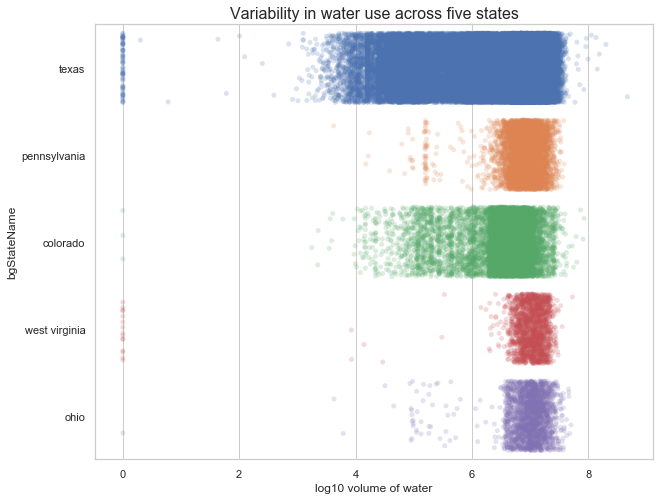

In [6]:
sns.set(style="whitegrid")
states = ['ohio','west virginia','pennsylvania','colorado','texas']
t = t[t.bgStateName.isin(states)]
fig = plt.figure(figsize=(10,8))
ax = sns.stripplot(t['log(TBWV)'],t.bgStateName,jitter=.4, alpha=0.2)
plt.xlabel('log10 volume of water');
plt.title('Variability in water use across five states',fontsize=16)

Although not shown here, water use for the 2011-2013 years is available in the raw data set.  Many of the 'empty events' of FFVersion 1 have values for TotalBaseWaterVolume.  While these events are filtered out of the data set analyzed here, they are available in the 'full_df.csv'.

# Chemical lists

## Most frequently used
Note that a given CAS number can occur more than once in a given event (for example, water may have a record for each product that it is in).  

In [7]:
gb = df.groupby('bgCAS',as_index=False)['CASNumber'].count()
ing = df.groupby('bgCAS',as_index=False)['bgIngredientName'].first()
gb = pd.merge(ing,gb,on='bgCAS',how='right',validate='1:1')
gb.columns = ['CAS number','ingredient name','frequency']
gb.sort_values('frequency',ascending=False).head(50)

,CAS number,ingredient name,frequency
1166,cas_unresolved,name_unresolved,624444
976,7732-18-5,water,319176
267,14808-60-7,quartz (sio2),163661
698,67-56-1,methanol,123090
660,64742-47-8,"distillates (petroleum), hydrotreated light",102008
947,7647-01-0,hydrochloric acid,81519
948,7647-14-5,sodium chloride (nacl),63049
699,67-63-0,2-propanol,62259
57,107-21-1,"1,2-ethanediol",53126
1081,9000-30-0,guar gum,46633


## Largest by total mass

In [8]:
gb = df.groupby('bgCAS',as_index=False)['bgMass'].sum()
ing = df.groupby('bgCAS',as_index=False)['bgIngredientName'].first()
gb = pd.merge(ing,gb,on='bgCAS',how='right',validate='1:1')
gb.columns = ['CAS number','ingredient name','total mass']
gb.sort_values('total mass',ascending=False).head(50)

,CAS number,ingredient name,total mass
976,7732-18-5,water,4.820788e+12
267,14808-60-7,quartz (sio2),5.622003e+11
947,7647-01-0,hydrochloric acid,6.017670e+09
1166,cas_unresolved,name_unresolved,4.416252e+09
660,64742-47-8,"distillates (petroleum), hydrotreated light",2.000651e+09
184,1302-93-8,mullite (al6o5(sio4)2),1.919164e+09
1081,9000-30-0,guar gum,1.752708e+09
225,1344-28-1,aluminum oxide (al2o3),1.106183e+09
973,7727-37-9,nitrogen,9.840734e+08
180,1302-74-5,corundum (al2o3),8.243215e+08


## largest by average mass
Some chemicals are not used frequently, but when they are used, it is in large quantity

In [9]:
gb = df.groupby('bgCAS',as_index=False)['bgMass'].mean()
ing = df.groupby('bgCAS',as_index=False)['bgIngredientName'].first()
gb = pd.merge(ing,gb,on='bgCAS',how='right',validate='1:1')
gb.columns = ['CAS number','ingredient name','average mass']
gb.sort_values('average mass',ascending=False).head(50)
#gb.sort_values('average mass',ascending=False)[:10].plot.barh('ingredient name','average mass')

,CAS number,ingredient name,average mass
976,7732-18-5,water,1.649119e+07
267,14808-60-7,quartz (sio2),3.714399e+06
691,66402-68-4,"ceramic materials and wares, chemicals",2.269189e+06
206,1318-16-7,bauxite,1.822835e+06
32,10326-27-9,"barium chloride (bacl2), dihydrate (9ci)",1.743477e+06
905,7440-21-3,silicon,1.706756e+06
503,50-28-2,"estra-1,3,5(10)-triene-3,17-diol (17î²)-",1.086665e+06
223,1343-88-0,"silicic acid, magnesium salt",9.757280e+05
184,1302-93-8,mullite (al6o5(sio4)2),8.676147e+05
973,7727-37-9,nitrogen,7.399048e+05


## What is the mass of those chemicals claimed as "Proprietary?"

'Proprietary' designation in this data set includes many terms used in the CAS field name such as 'proprietary,' 'confidential,' 'trade secret,' and numerous spelling variations of those items.  See the file in the data section named: cas_labels.csv for a full list.

Each bar shows the number of proprietary records in that (log) mass class


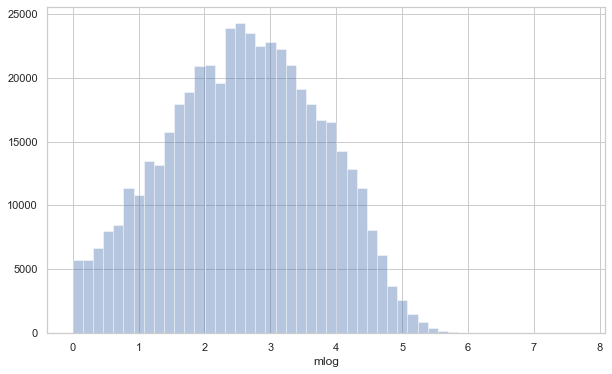

In [10]:
df['mlog'] = np.where(df.bgMass>0,np.log10(df.bgMass+1),np.NaN)
sns.set(style="whitegrid")
fig = plt.figure(figsize=(10,6))
ax = sns.distplot(df[(df.DQ_code.str.contains('3'))&(~df.mlog.isna())].mlog,kde=False)
print('Each bar shows the number of proprietary records in that (log) mass class')

## How big do they get?

All proprietary records greater than 20,000 lbs.


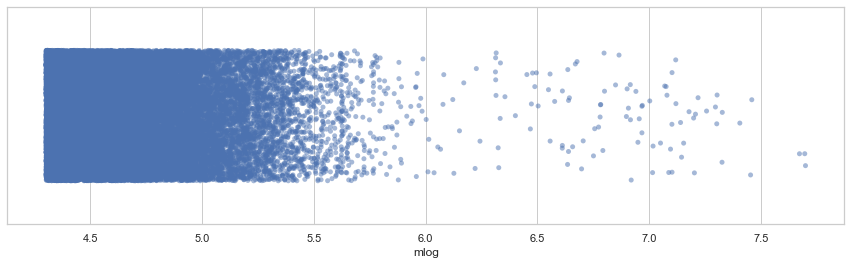

In [22]:
fig = plt.figure(figsize=(15,4))
ax = sns.stripplot(df[(df.DQ_code.str.contains('3'))&(df.bgMass>20000)].mlog,jitter=.3,alpha=.5)
print('All proprietary records greater than 20,000 lbs.')

Reminder: values on these log graphs of exactly '5.0' are 100,000 lbs.; exactly '7.0' are 10,000,000 lbs.  Each dot corresponds to a single chemical applied in a single event.  

In [12]:
t = len(df[(df.mlog>5)&(df.DQ_code.str.contains('3'))])
print(f'Number of Proprietary records with mass >100,000 lbs.: {t}')

Number of Proprietary records with mass >100,000 lbs.: 4329


# Case study:  2-butoxyethanol  or 2-BE  (CAS 111-76-2)
In this section, I illustrate some of the detail that is available to use in the filtered data set

## Frequency of use

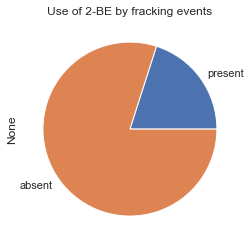

In [13]:
df2be = df[df.bgCAS=='111-76-2'].copy()
totEv = len(df.UploadKey.unique())
pres2BE = len(df2be.UploadKey.unique())
pd.Series({'present':pres2BE,'absent':totEv-pres2BE}).plot.pie(title='Use of 2-BE by fracking events');
#print(totEv,pres2BE)

## Most frequent users of 2-BE

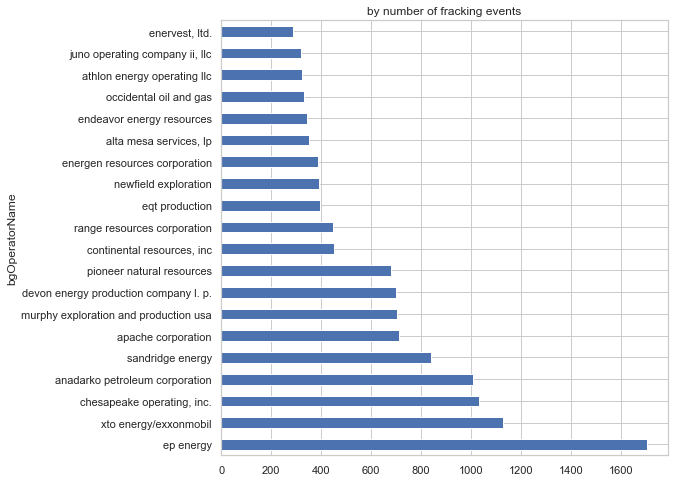

In [14]:
df2be.groupby('bgOperatorName')['UploadKey'].count()\
     .sort_values(ascending=False)[:20].plot.barh(title='by number of fracking events',
                                                 figsize=(8,8));

## Most frequent Suppliers of 2-BE
Note that in one mode of data entry called 'System Approach' used in FFVersion 3, supplier names as well as the product names are disconnected from the chemical record.

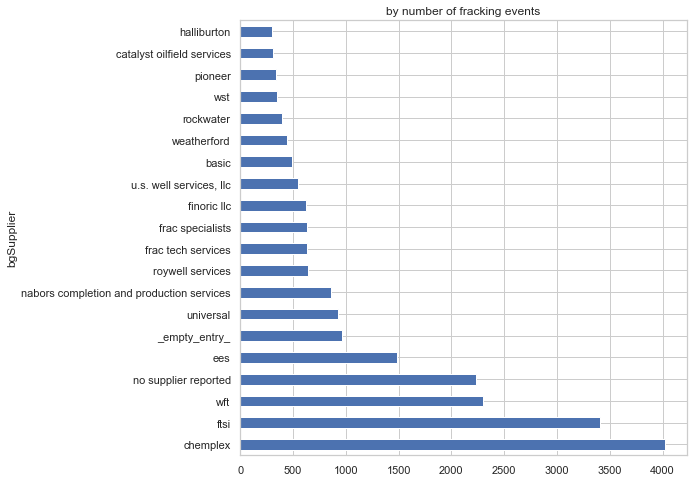

In [15]:
df2be.groupby('bgSupplier')['UploadKey'].count()\
     .sort_values(ascending=False)[:20].plot.barh(title='by number of fracking events',
                                                 figsize=(8,8));

## By total mass by operator
That is, the total amount of 2-BE used by these operators over all their disclosures.

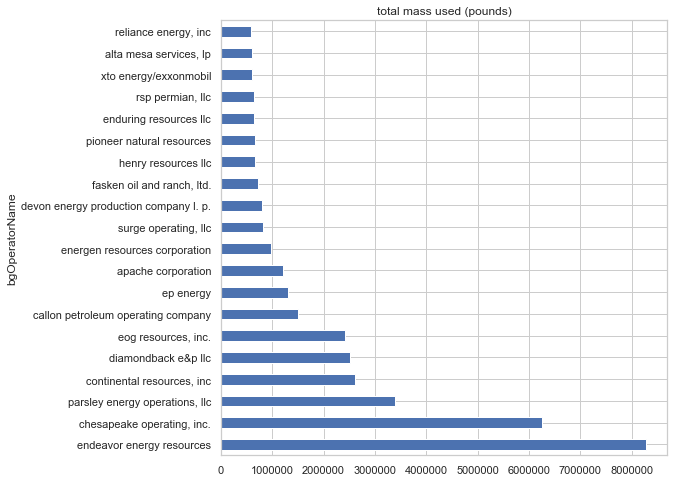

In [16]:
df2be.groupby('bgOperatorName')['bgMass'].sum()\
     .sort_values(ascending=False)[:20].plot.barh(title='total mass used (pounds)',
                                                 figsize=(8,8));

## Comparison of 6 operators for quantity used

Text(0.5, 1.0, 'Variability in use of "2-BE" across six operators')

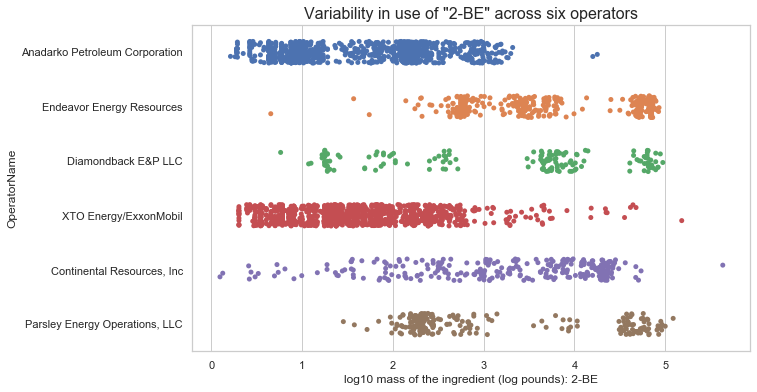

In [17]:
sns.set(style="whitegrid")
ops = ['parsley energy operations, llc','endeavor energy resources','continental resources, inc',
       'anadarko petroleum corporation','xto energy/exxonmobil','diamondback e&p llc']
t = df2be[df2be.bgOperatorName.isin(ops)]
t = t[t.DQ_code.str.contains('M')]
fig = plt.figure(figsize=(10,6))
ax = sns.stripplot(np.log10(t.bgMass+1),t.OperatorName,jitter=.2)
plt.xlabel('log10 mass of the ingredient (log pounds): 2-BE');
plt.title('Variability in use of "2-BE" across six operators',fontsize=16)

## Are heavy uses of 2-BE changing over time?

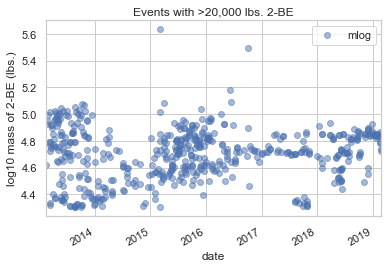

In [18]:
df2be['mlog'] = np.log10(df2be.bgMass+1)
df2be[df2be.bgMass>20000].plot('date','mlog',title='Events with >20,000 lbs. 2-BE',
                                                          style='o',alpha=.5)
plt.ylabel('log10 mass of 2-BE (lbs.)');

## Where are those heavy uses reported?

Number of large uses of 2-BE (>10 tons) by state


<Figure size 432x288 with 0 Axes>

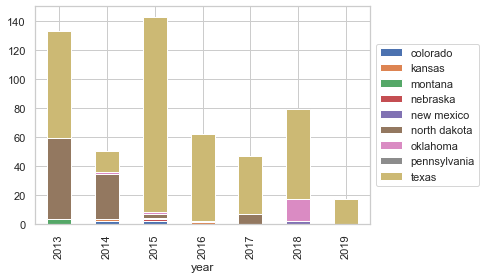

In [36]:
t = df2be[df2be.bgMass>20000].copy()
bg = t.groupby(['year','bgStateName'],as_index=False)['bgMass'].count()
piv = pd.pivot(bg,index='year',columns='bgStateName',values='bgMass')
piv.reset_index(inplace=True)
fig = plt.figure()
piv.plot.bar(x='year',stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5));
print('Number of large uses of 2-BE (>10 tons) by state')

Note that the FracFocus data include latitude and longitude so plotting these data on a map is relatively easy.